# Resistance plant gene prediction

**<span style="font-size:22px;">About the project</span>**

This analysis is part of my thesis with topic **Deep learning and LLMs revolutionize the drug development**. The project is focused on bioinformatics and aims to contribute valuable insights into the field of plant genetics and enhance our understanding of resistance patterns. The knowledge of plant gene resistance can be beneficial in several fields and applications beyond just agricultural improvement. Areas where this knowledge can have a significant impact rather than agricultural are also the drug discovery and development where discovering new medicinal properties and compounds in resistant plants, could lead to the development of new drugs and treatments for various diseases.

**<span style="font-size:22px;">Dataset</span>**

The dataset is provided as part of the [Bioinformatics Hackathon on Kaggle](https://www.kaggle.com/competitions/bioinformatics-hackathon-prg/overview). It includes various genetic sequences from plants, with labels indicating resistance.

**<span style="font-size:22px;">Objective of the project</span>**

1. Main objective is to develop predictive models that can accurately determine whether certain plant genes are resistant to specific conditions or not. The model that we will build is a Transformer model that can have several advantages rather than other mondel. The core advantage of transformers is the attention mechanism, which allows the model to focus on different parts of the input sequence that are more relevant for making predictions. In the context of gene sequences, this means a transformer can learn to pay more attention to specific gene markers or motifs that indicate resistance

2. Secondary objective is 

## Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
from collections import Counter

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt


# Parameters 
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')

## Data Loading

In [2]:
molecules = pd.read_csv('Data/train.csv')

In [3]:
molecules.sample(6)

,ID,Sequence,Label
6166,8256,MASTPRTPAPVRSPPPVPTPTHPTPPPPPLETPQPPLPVSTPPPAL...,0
13808,18425,MQVVVLKLDVHCEKTKQKAMSTVCCLSGVNSVEVKDGKLTVTGEID...,0
7146,9554,MPLSNNVIGCINFITVLLSIPVIGAGIWLAIGTVNSCVKLLQWPVI...,0
11635,15558,MAGAMTMSRRRLSHALLLVLAILPNLAALAVAAGGGSGGGGFFPHR...,0
468,651,MLDYEWDNPSSIVLSGDERNPDSDPTRSSFSFFDPISHYNNDHRHI...,0
12380,16534,MARSNVPKFGNWEAEENVPYTAYFDKARKTRAPGSKIMNPNDPEYN...,1


In [4]:
molecules.iloc[0, 1]

'MDSRMDQYEVMEQIGRGAFGAAILVNHKTEKKKYVLKKIRLARQTERCRKSAHQEMALIARLQHPYIVEFKEAWVEKGCYVCIVTGYCEGGDMAELMKKANGTYFPEEKLLKWFAQLALAVDYLHSNFVLHRDLKCSNIFLTKDQDIRLGDFGLAKTLKADDLTSSVVGTPNYMCPELLADIPYGFKSDIWSLGCCMYEMAAHRPAFKAFDMAGLISKINRSSIGPLPPCYSPSMKSLIKSMLRKSPEHRPTASEILKSPYLQPYVNQYRPFADISHPIHSLEKPITSSRSSQKSMSGSQCSSISGSDIDSIQSSERNTSGPSTSSNNTIDTEGAEATDHVSVKNCSRSDDVKSNKETVGPELERQDSSKSIHVDQRPRNEIKQPKIIKKILTTLREESKLRQNNSPIRASRVKLNSPSNREQLSDDSKHSSDISSSSKSSEVTSRESAKVICEPVKRAQASPPLKHLSPIVEHSPKAKIKQDEPLQPDPAKQAMEDVDAAVGKVKNRTPPSYSRRLSIPPRRPLGAESPLHADTKRAHNKVIKERAKSPCRPVHGPDNDIIEPPGFPMAPPSPLGGVQMKVGNARAKSAPPRAVSIKEDSSDCSSSTIAYAENTELSEPSKQDSSAQLVSSCKCSIPDAAIQKHDLTAMPSSELNTTNFQKSMASNDDVCENLALEPSSDISEQVSIFKDNVPCSKISQSTANAIVQNDEDKFTVQELLSSVADIAPFVSTKNFALEKGSPPIQSLERTSSPHLNPPIEDVIHVIRHSSFRVCGEQAVAENAEMGVQSSDVGKLLNVVREEVDSRSIPSNNLVPHRLPDCAAPKPNISETNTISSKTACSDVVKFLTVPEVNSTTTAINNGFKEEASPTKEILDVKSFRQRAEALEGLLELSADLLQHNRLEELAVVLKPFGKDKVSPRETAIWLAKSFKGMMNDEASRSSM'

## Exploratory data analysis (EDA)

In [5]:
molecules.describe()

,ID,Label
count,14161.000000,14161.000000
mean,9469.114116,0.089965
std,5461.636271,0.286142
min,0.000000,0.000000
25%,4732.000000,0.000000
50%,9471.000000,0.000000
75%,14222.000000,0.000000
max,18881.000000,1.000000


In [6]:
molecules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14161 entries, 0 to 14160
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        14161 non-null  int64 
 1   Sequence  14161 non-null  object
 2   Label     14161 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 332.0+ KB


In [7]:
molecules.isna().sum()

ID          0
Sequence    0
Label       0
dtype: int64

In [8]:
aminos = []
for sequence in molecules.Sequence:
    amino_counter = Counter(sequence)
    aminos.append([len(amino_counter), amino_counter])

In [9]:
aminos[:2]

[[20,
  Counter({'S': 123,
           'K': 75,
           'A': 71,
           'L': 68,
           'P': 68,
           'E': 66,
           'V': 56,
           'I': 55,
           'D': 53,
           'R': 48,
           'N': 42,
           'T': 39,
           'Q': 35,
           'G': 35,
           'F': 23,
           'H': 23,
           'M': 22,
           'C': 21,
           'Y': 16,
           'W': 4})],
 [18,
  Counter({'K': 30,
           'A': 19,
           'E': 15,
           'G': 11,
           'S': 11,
           'P': 9,
           'I': 9,
           'L': 7,
           'V': 7,
           'T': 7,
           'R': 6,
           'F': 4,
           'M': 3,
           'Y': 3,
           'N': 3,
           'Q': 2,
           'H': 2,
           'D': 2})]]

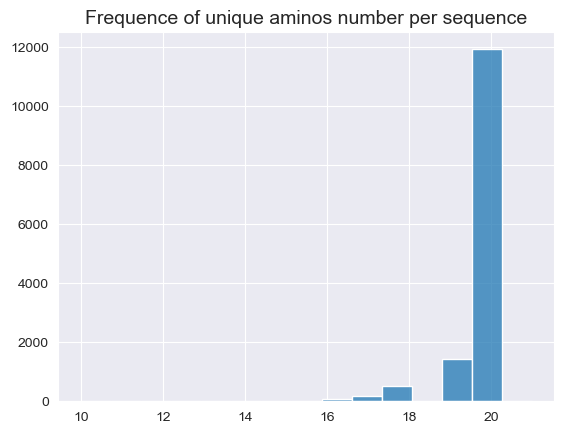

In [10]:
sns.histplot([row[0] for row in aminos])

plt.title('Frequence of unique aminos number per sequence', fontsize=14)
plt.ylabel(None)
plt.savefig('Figures/No_unique_aminos_per_sequence.png')
plt.show()

In [11]:
aminos_variance = pd.DataFrame([row[1] for row in aminos]).fillna(0).astype(int)
aminos_variance

,M,D,S,R,Q,Y,E,V,I,G,A,F,L,N,H,K,T,C,P,W,X,Z,B
0,22,53,123,48,35,16,66,56,55,35,71,23,68,42,23,75,39,21,68,4,0,0,0
1,3,2,11,6,2,3,15,7,9,11,19,4,7,3,2,30,7,0,9,0,0,0,0
2,2,2,7,5,3,1,3,7,3,5,3,5,12,6,3,5,3,1,4,1,0,0,0
3,10,9,27,6,13,15,12,31,19,22,22,23,41,13,5,22,24,10,15,5,0,0,0
4,9,21,28,20,9,8,19,27,19,43,41,8,32,11,10,17,10,6,11,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14156,4,4,7,2,2,3,12,5,2,5,9,3,9,3,1,11,5,0,3,2,0,0,0
14157,10,23,42,30,7,13,21,26,6,36,41,12,26,5,7,12,19,10,34,6,0,0,0
14158,4,21,26,19,12,11,23,14,8,26,10,12,15,19,16,21,14,11,16,4,0,0,0
14159,16,32,45,38,16,14,23,51,23,46,55,25,44,12,8,15,22,6,25,8,0,0,0


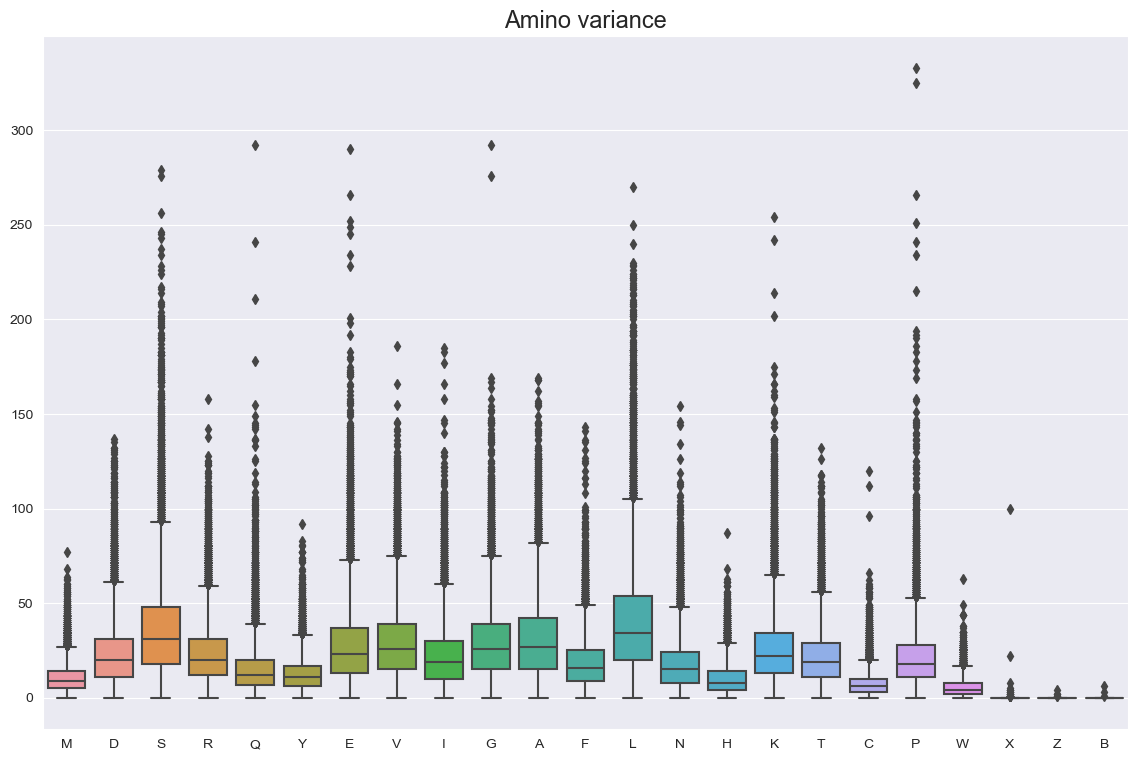

In [12]:
plt.figure(figsize=(14, 9))

sns.boxplot(aminos_variance)

plt.title('Amino variance', fontsize=17)
plt.savefig('Figures/Amino_variance.png')
plt.show()

## ChatGPT embeddings